Loading of necessary packages

In [1]:
import sys
import os
import xarray as xr
import pandas as pd

Loading of custom module

In [2]:
sys.path.insert(0, os.path.abspath('..'))  # hacky way to import within package
from src import sar_analysis

Load example data

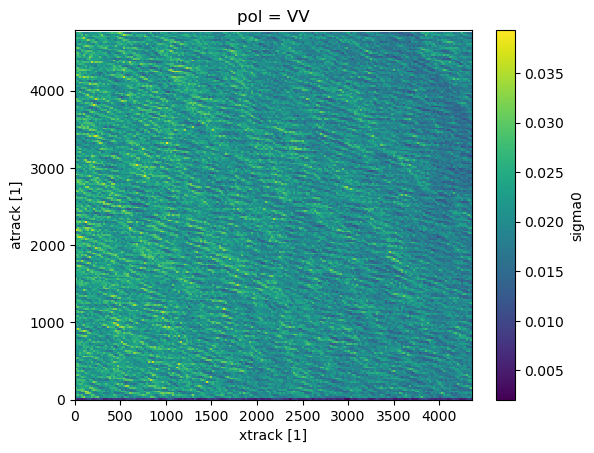

In [4]:
sar_ds = xr.open_dataset('../data/roll.nc')
sar_ds.sigma0.plot()

Insert example data in function along with a-priori knowledge or estimates of boundary layer height and wind direction

In [5]:
# -- a-priori estimates 
zi_ref = 800           # Planetary Boundary Layer Height (PBL/PBLH/Zi) [m]
wdir_ambiguity = 100   # A-priori wind direction to resolve 180 ambiguity [deg]
wdir_ref = None        # Reference wind direction to use for calculation of wind field in cmod5.n [deg]

output = sar_analysis(sar_ds, zi_ref, wdir_ambiguity = wdir_ambiguity, wdir_ref = wdir_ref)

Convert output to convenient dataframe with parameter names

In [6]:
parameter_list = ['time_imagette', 'lat_sar', 'lon_sar', 'U_n', 'wdir', 'incidence_avg', 'mean_ground_heading', 'energy_dir_range',
    'energy_dir', 'window_effect', 'polar_effect', 'var_cartesian', 'var_windfield', 'var_polar', 'var_bandpass', 'var_highpass',
    'var_lowpass', 'var_beam', 'var_bandpass_beam', 'var_beyond_nyquist', 'frac_beam', 'frac_bandpass', 'frac_lowpass',
    'frac_highpass', 'density_beam', 'density_bandpass', 'density_beam_bandpass','u_star', 'z_0', 'Cdn', 'sigma_u', 'L', 'B', 'w_star', 
    'w_star_normalised_deviation', 'corr_fact', 'H', 'spectral_peak', 'spectral_valley', 'mean_25th', 'median_25th', 'std_25th', 
    'mad_25th', 'mean_50th', 'median_50th', 'std_50th', 'mad_50th', 'mean_75th', 'median_75th', 'std_75th', 'mad_75th',
    'S_windfield_xi_mean', 'S_windfield_xi_norm_std', 'S_sigma0_xi_mean', 'S_sigma0_xi_std_norm'] 

df = pd.DataFrame(columns = parameter_list)
df.loc[0] = output
df

,time_imagette,lat_sar,lon_sar,U_n,wdir,incidence_avg,mean_ground_heading,energy_dir_range,energy_dir,window_effect,...,std_50th,mad_50th,mean_75th,median_75th,std_75th,mad_75th,S_windfield_xi_mean,S_windfield_xi_norm_std,S_sigma0_xi_mean,S_sigma0_xi_std_norm
0,2020-04-06 03:08:55.355190,-6.904402,-131.906714,6.210938,118.137035,37.13308,-12.362965,310.5,208.137035,0.967959,...,37.371,37.5,87.311111,101.0,53.120543,46.0,0.000456,0.146968,1.140999e-08,0.161231
